In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
import seaborn as sns
%matplotlib inline
continent_3=pd.read_excel('/Users/Tal/Desktop/2019 Fall/Data Visualization/final project/continent_3.xlsx')
continent_3.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,舕and Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [2]:
continent=pd.read_csv('/Users/Tal/Desktop/2019 Fall/Data Visualization/final project/continent.csv')
continent.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [3]:
continent_sp=continent[['Continent_Name','Three_Letter_Country_Code']]
continent_sp.rename(columns={'Three_Letter_Country_Code':'code_3'},inplace=True)
continent_sp.tail(2)

/Users/Tal/anaconda3/envs/dviz/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Continent_Name,code_3
260,Asia,NaN
261,Asia,NaN


In [4]:
continent_4=pd.read_excel('/Users/Tal/Desktop/2019 Fall/Data Visualization/final project/continent_4.xlsx')
continent_4.rename(columns={'A-3':'code_3'},inplace=True)
continent_4_sp=continent_4[['249 countries','code_3','IOC']]
continent_4_sp.tail(30)

,249 countries,code_3,IOC
229,Timor-Leste,TLS,TLS
230,Togo,TGO,TOG
231,Tokelau,TKL,NaN
232,Tonga,TON,TGA
233,Trinidad and Tobago,TTO,TTO
234,Tunisia,TUN,TUN
235,Turkey,TUR,TUR
236,Turkmenistan,TKM,TKM
237,Turks and Caicos Islands,TCA,TKS
238,Tuvalu,TUV,TUV


In [5]:
continent_merged=continent_4_sp.merge(continent_sp, on='code_3', how='left')
continent_merged.sample(4)

,249 countries,code_3,IOC,Continent_Name
142,Latvia,LVA,LAT,Europe
198,Philippines,PHL,PHI,Asia
203,Qatar,QAT,QAT,Asia
138,"Korea, South",KOR,KOR,Asia


In [6]:
continent_merged.rename(columns={'IOC':'NOC'},inplace=True)
continent_merged.head()

,249 countries,code_3,NOC,Continent_Name
0,Afghanistan,AFG,AFG,Asia
1,Åland,ALA,NaN,Europe
2,Albania,ALB,ALB,Europe
3,Algeria,DZA,ALG,Africa
4,American Samoa,ASM,ASA,Oceania


In [7]:
data = pd.read_csv('/Users/Tal/Desktop/2019 Fall/Data Visualization/final project/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [8]:
summer= data[data.Season=='Summer']
summer.sample(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
217706,109347,Gennady Ivanovich Shatkov,M,24.0,172.0,78.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Boxing,Boxing Men's Middleweight,Gold
222695,111868,Mark Gainsford Slade,M,21.0,183.0,77.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Sabre, Individual",NaN


In [9]:
summer_con=summer.merge(continent_merged,on='NOC',how='left')
summer_con.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,249 countries,code_3,Continent_Name
229003,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russian Federation,RUS,Europe
229004,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russian Federation,RUS,Asia
229005,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russian Federation,RUS,Europe
229006,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russian Federation,RUS,Asia
229007,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,BLR,Europe


In [10]:
summer_con_simple = summer_con[['Sex', 'Team','Year','Continent_Name']]
summer_con_simple.head()

,Sex,Team,Year,Continent_Name
0,M,China,1992,Asia
1,M,China,2012,Asia
2,M,Denmark,1920,Europe
3,M,Denmark/Sweden,1900,Europe
4,F,Netherlands,1932,Europe


In [11]:
summer_con_classified2=pd.crosstab(summer_con_simple.Year, [summer_con_simple.Sex,summer_con_simple.Continent_Name])
summer_con_classified2.tail()

Sex                 F                                                       M  \
Continent_Name Africa  Asia Europe North America Oceania South America Africa   
Year                                                                            
2000              327  1198   2718           808     473           237    665   
2004              300  1333   2787           794     375           295    598   
2008              365  1446   2870           793     383           348    577   
2012              382  1372   2958           782     368           340    574   
2016              409  1385   2897           900     420           520    657   

Sex                                                              
Continent_Name  Asia Europe North America Oceania South America  
Year                                                             
2000            1824   4324          1097     544           410  
2004            1725   4141           982     462           446  
2008            1884   3879          1035     450           454  
2012            1611   3648           850     428           468  
2016            1591   3526           916     449           731

In [12]:
summer_con_classified2['M', 'total'] = summer_con_classified2.iloc[:,0:12].sum(axis=1)
summer_con_classified2['M', 'female_percent']=summer_con_classified2.iloc[:,0:6].sum(axis=1)/summer_con_classified2['M', 'total'] 
summer_con_classified2.tail()

Sex                 F                                                       M  \
Continent_Name Africa  Asia Europe North America Oceania South America Africa   
Year                                                                            
2000              327  1198   2718           808     473           237    665   
2004              300  1333   2787           794     375           295    598   
2008              365  1446   2870           793     383           348    577   
2012              382  1372   2958           782     368           340    574   
2016              409  1385   2897           900     420           520    657   

Sex                                                                     \
Continent_Name  Asia Europe North America Oceania South America  total   
Year                                                                     
2000            1824   4324          1097     544           410  14625   
2004            1725   4141           982     462           446  14238   
2008            1884   3879          1035     450           454  14484   
2012            1611   3648           850     428           468  13781   
2016            1591   3526           916     449           731  14401   

Sex                            
Continent_Name female_percent  
Year                           
2000                 0.393915  
2004                 0.413260  
2008                 0.428404  
2012                 0.450040  
2016                 0.453510

In [13]:
summer_con_classified2['M','Africa_percent']=summer_con_classified2.iloc[:,0]/(summer_con_classified2.iloc[:,0]+
                                                                              summer_con_classified2.iloc[:,6])
summer_con_classified2['M','Asia_percent']=summer_con_classified2.iloc[:,1]/(summer_con_classified2.iloc[:,1]+
                                                                              summer_con_classified2.iloc[:,7])
summer_con_classified2['M','Europe_percent']=summer_con_classified2.iloc[:,2]/(summer_con_classified2.iloc[:,2]+
                                                                              summer_con_classified2.iloc[:,8])
summer_con_classified2['M','North America_percent']=summer_con_classified2.iloc[:,3]/(summer_con_classified2.iloc[:,3]+
                                                                              summer_con_classified2.iloc[:,9])
summer_con_classified2['M','Oceania_percent']=summer_con_classified2.iloc[:,4]/(summer_con_classified2.iloc[:,4]+
                                                                              summer_con_classified2.iloc[:,10])
summer_con_classified2['M','South America_percent']=summer_con_classified2.iloc[:,5]/(summer_con_classified2.iloc[:,5]+
                                                                              summer_con_classified2.iloc[:,11])
summer_con_classified2.tail()

Sex                 F                                                       M  \
Continent_Name Africa  Asia Europe North America Oceania South America Africa   
Year                                                                            
2000              327  1198   2718           808     473           237    665   
2004              300  1333   2787           794     375           295    598   
2008              365  1446   2870           793     383           348    577   
2012              382  1372   2958           782     368           340    574   
2016              409  1385   2897           900     420           520    657   

Sex                                                                     \
Continent_Name  Asia Europe North America Oceania South America  total   
Year                                                                     
2000            1824   4324          1097     544           410  14625   
2004            1725   4141           982     462           446  14238   
2008            1884   3879          1035     450           454  14484   
2012            1611   3648           850     428           468  13781   
2016            1591   3526           916     449           731  14401   

Sex                                                                       \
Continent_Name female_percent Africa_percent Asia_percent Europe_percent   
Year                                                                       
2000                 0.393915       0.329637     0.396426       0.385970   
2004                 0.413260       0.334076     0.435906       0.402281   
2008                 0.428404       0.387473     0.434234       0.425248   
2012                 0.450040       0.399582     0.459940       0.447775   
2016                 0.453510       0.383677     0.465390       0.451035   

Sex                                                                         
Continent_Name North America_percent Oceania_percent South America_percent  
Year                                                                        
2000                        0.424147        0.465093              0.366306  
2004                        0.447072        0.448029              0.398111  
2008                        0.433807        0.459784              0.433915  
2012                        0.479167        0.462312              0.420792  
2016                        0.495595        0.483314              0.415667

In [14]:
df=summer_con_classified2.drop(summer_con_classified2.iloc[:,0:12],axis=1,inplace=False)
df.head()

Sex                M                                             \
Continent_Name total female_percent Africa_percent Asia_percent   
Year                                                              
1896             380       0.000000            NaN          NaN   
1900            1932       0.016046            NaN          0.0   
1904            1300       0.012308            0.0          NaN   
1906            1695       0.006490            0.0          0.0   
1908            3019       0.015568            0.0          0.0   

Sex                                                                  \
Continent_Name Europe_percent North America_percent Oceania_percent   
Year                                                                  
1896                 0.000000              0.000000             0.0   
1900                 0.012528              0.059603             0.0   
1904                 0.000000              0.013605             0.0   
1906                 0.006905              0.000000             0.0   
1908                 0.018001              0.000000             NaN   

Sex                                   
Continent_Name South America_percent  
Year                                  
1896                             NaN  
1900                             0.0  
1904                             NaN  
1906                             NaN  
1908                             0.0

In [15]:
df_new = df.xs('M', axis=1, drop_level=True)
df_new.tail()

Continent_Name,total,female_percent,Africa_percent,Asia_percent,Europe_percent,North America_percent,Oceania_percent,South America_percent
Year,,,,,,,,
2000,14625,0.393915,0.329637,0.396426,0.385970,0.424147,0.465093,0.366306
2004,14238,0.413260,0.334076,0.435906,0.402281,0.447072,0.448029,0.398111
2008,14484,0.428404,0.387473,0.434234,0.425248,0.433807,0.459784,0.433915
2012,13781,0.450040,0.399582,0.459940,0.447775,0.479167,0.462312,0.420792
2016,14401,0.453510,0.383677,0.465390,0.451035,0.495595,0.483314,0.415667


In [16]:
df2=df_new.drop(df_new.iloc[:,0:1],axis=1,inplace=False)

In [17]:
df2.tail()

Continent_Name,female_percent,Africa_percent,Asia_percent,Europe_percent,North America_percent,Oceania_percent,South America_percent
Year,,,,,,,
2000,0.393915,0.329637,0.396426,0.385970,0.424147,0.465093,0.366306
2004,0.413260,0.334076,0.435906,0.402281,0.447072,0.448029,0.398111
2008,0.428404,0.387473,0.434234,0.425248,0.433807,0.459784,0.433915
2012,0.450040,0.399582,0.459940,0.447775,0.479167,0.462312,0.420792
2016,0.453510,0.383677,0.465390,0.451035,0.495595,0.483314,0.415667


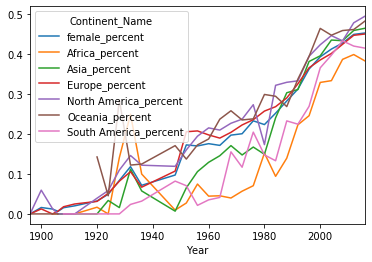

In [18]:
df2.plot()

In [19]:
df3=df2.reset_index(inplace=False)
df3.head()

Continent_Name,Year,female_percent,Africa_percent,Asia_percent,Europe_percent,North America_percent,Oceania_percent,South America_percent
0,1896,0.000000,NaN,NaN,0.000000,0.000000,0.0,NaN
1,1900,0.016046,NaN,0.0,0.012528,0.059603,0.0,0.0
2,1904,0.012308,0.0,NaN,0.000000,0.013605,0.0,NaN
3,1906,0.006490,0.0,0.0,0.006905,0.000000,0.0,NaN
4,1908,0.015568,0.0,0.0,0.018001,0.000000,NaN,0.0


In [20]:
df3.columns = ['Year', 'Global', 'Africa', 'Asia', 'Europe','N_America','Oceania','S_America']

In [21]:
df3_tidy=pd.melt(df3,id_vars=['Year'],var_name='Continent',value_name='Percentage')
df3_tidy.sample(5)

,Year,Continent,Percentage
62,1908,Asia,0.000000
56,2012,Africa,0.399582
89,1904,Europe,0.000000
41,1952,Africa,0.027356
93,1920,Europe,0.031429


In [22]:
df3.columns.name = None
df3.head()

,Year,Global,Africa,Asia,Europe,N_America,Oceania,S_America
0,1896,0.000000,NaN,NaN,0.000000,0.000000,0.0,NaN
1,1900,0.016046,NaN,0.0,0.012528,0.059603,0.0,0.0
2,1904,0.012308,0.0,NaN,0.000000,0.013605,0.0,NaN
3,1906,0.006490,0.0,0.0,0.006905,0.000000,0.0,NaN
4,1908,0.015568,0.0,0.0,0.018001,0.000000,NaN,0.0


In [23]:
df3_untidy=df3_tidy.pivot(index='Year', columns='Continent', values='Percentage')
df3_untidy.head()

Continent,Africa,Asia,Europe,Global,N_America,Oceania,S_America
Year,,,,,,,
1896,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN
1900,NaN,0.0,0.012528,0.016046,0.059603,0.0,0.0
1904,0.0,NaN,0.000000,0.012308,0.013605,0.0,NaN
1906,0.0,0.0,0.006905,0.006490,0.000000,0.0,NaN
1908,0.0,0.0,0.018001,0.015568,0.000000,NaN,0.0


In [24]:
df3_untidy.columns.name = None

In [25]:
df3_untidy.head()

,Africa,Asia,Europe,Global,N_America,Oceania,S_America
Year,,,,,,,
1896,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN
1900,NaN,0.0,0.012528,0.016046,0.059603,0.0,0.0
1904,0.0,NaN,0.000000,0.012308,0.013605,0.0,NaN
1906,0.0,0.0,0.006905,0.006490,0.000000,0.0,NaN
1908,0.0,0.0,0.018001,0.015568,0.000000,NaN,0.0


In [63]:
alt.Chart(df3_tidy, title='How did the percentage of female athelets change for each continent?').mark_line().encode(
    x='Year',
    y=alt.Y('Percentage',title='Female Percentage'),
    color='Continent'
).properties(
    width=800,
    height=300).configure_title(
    fontSize=16).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)

##########################DEAL!

alt.Chart(...)

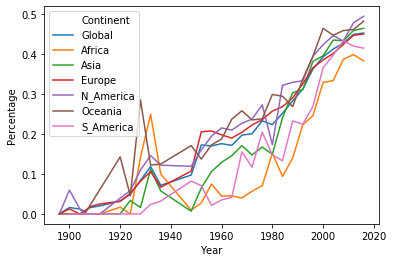

In [27]:
sns.lineplot(x='Year', y='Percentage', hue='Continent', data=df3_tidy) 
#This is typical speghetti plot

<Figure size 2160x2160 with 0 Axes>

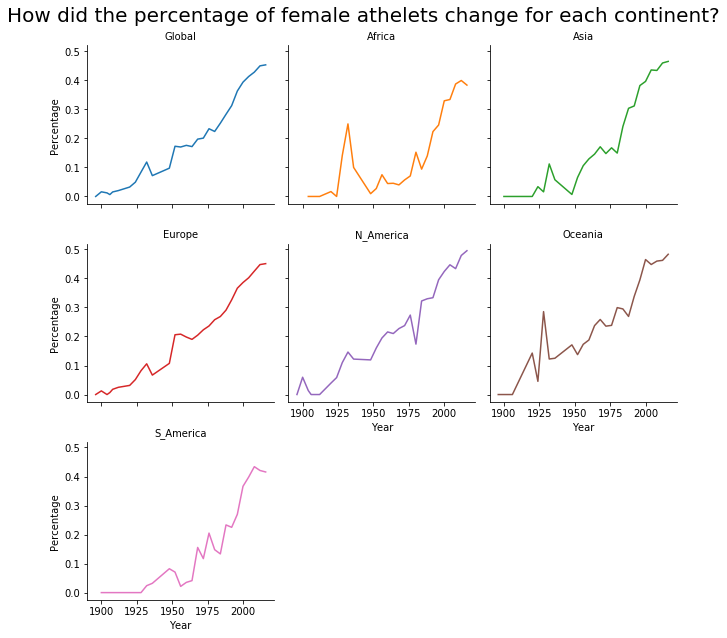

In [28]:
plt.figure(figsize=(30,30))

# Create a grid : initialize it
g = sns.FacetGrid(df3_tidy, col='Continent', hue='Continent', col_wrap=3, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'Percentage').set_titles("{col_name} Continent")

# Control the title of each facet
g = g.set_titles("{col_name}")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('How did the percentage of female athelets change for each continent?', fontsize=20)


plt.savefig('g-2-2')

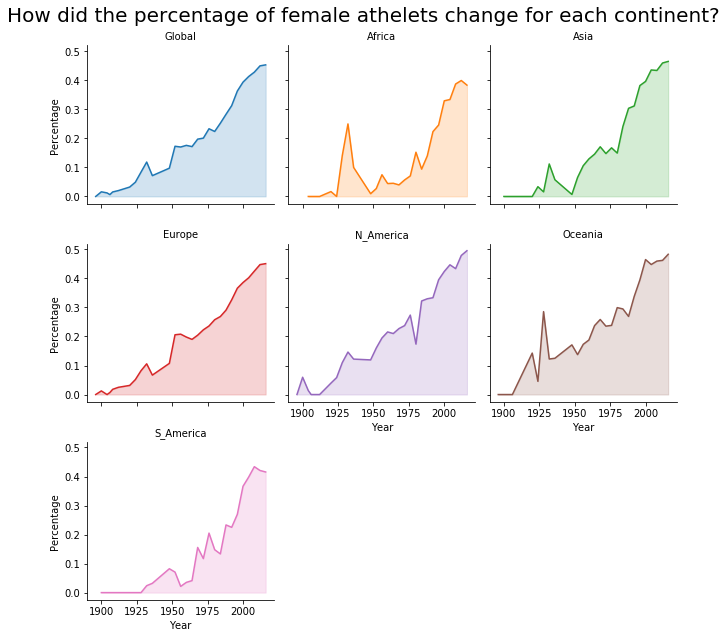

In [29]:


# Create a grid : initialize it
g = sns.FacetGrid(df3_tidy, col='Continent', hue='Continent', col_wrap=3, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'Percentage')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'Percentage', alpha=0.2).set_titles("{col_name} Continent")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('How did the percentage of female athelets change for each continent?', fontsize=20)

plt.savefig('g-2-3')

In [30]:

alt.Chart(df3_tidy).mark_line().encode(
    x='Year:N',
    y='Percentage:Q',
    color='Continent:N'
).properties(
    width=200,
    height=200
).facet(
    facet='Continent:N',
    columns=3
)

alt.FacetChart(...)

In [31]:
alt.Chart(df3_tidy).mark_area().encode(
    x='Year:N',
    y='Value:Q',
    color='Percent_type:N'
).properties(
    width=200,
    height=200
).facet(
    facet='Percent_type:N',
    columns=3
)

alt.FacetChart(...)

In [32]:
alt.Chart(df3_tidy).mark_area(color="lightblue",
    interpolate='step-after',
    line=True).encode(
    x='Year:N',
    y='Value:Q',
    color='Percent_type:N'
).properties(
    width=200,
    height=200
).facet(
    facet='Percent_type:N',
    columns=3
)


alt.FacetChart(...)

In [33]:
source = df3_tidy

alt.Chart(source, title='How did the percentage of female athelets change for each continent?').transform_filter(
    alt.datum.symbol != 'GOOG'
).mark_area().encode(
    x='Year:N',
    y='Percentage:Q',
    color='Continent:N',
    row=alt.Row('Continent:N')
).properties(height=100, width=350).configure_title(
    fontSize=16).configure_axis(
    labelFontSize=14,
    titleFontSize=16
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)


alt.Chart(...)

In [34]:
df4=df3
df4.columns = ['Year', 'All','Africa','Asia','Europe','N_America','Oceania','S_America']
df4.head()

,Year,All,Africa,Asia,Europe,N_America,Oceania,S_America
0,1896,0.000000,NaN,NaN,0.000000,0.000000,0.0,NaN
1,1900,0.016046,NaN,0.0,0.012528,0.059603,0.0,0.0
2,1904,0.012308,0.0,NaN,0.000000,0.013605,0.0,NaN
3,1906,0.006490,0.0,0.0,0.006905,0.000000,0.0,NaN
4,1908,0.015568,0.0,0.0,0.018001,0.000000,NaN,0.0


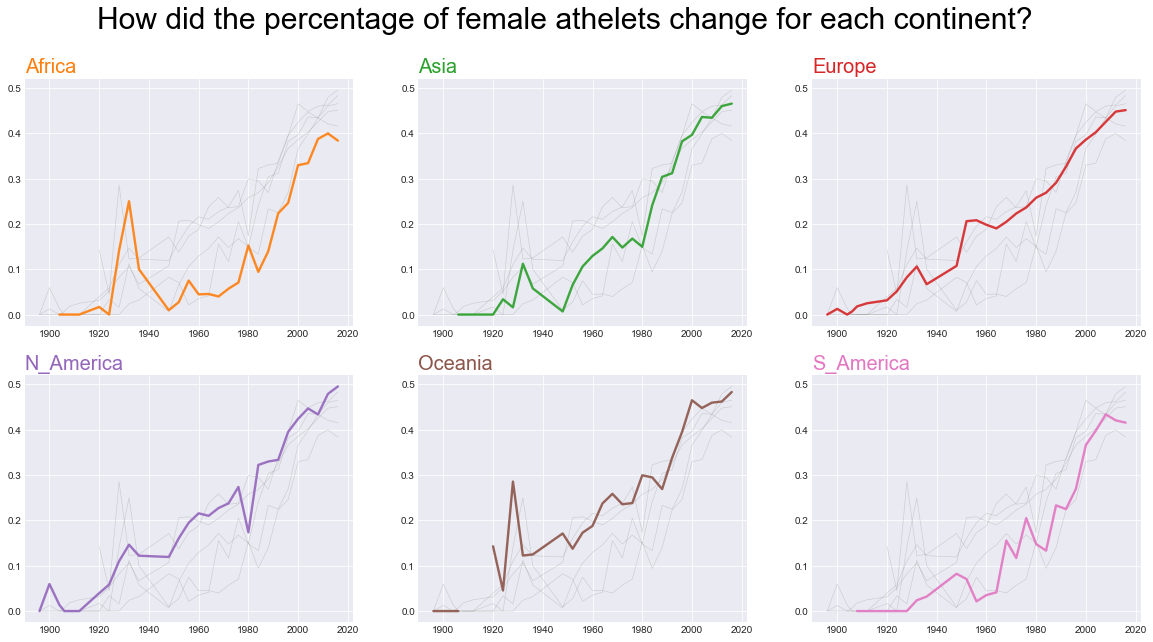

In [35]:

plt.figure(figsize=(20,10))

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('tab10')
 
# multiple line plot
num=0
for column in df4.drop(['Year', 'All'], axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # plot every groups, but discreet
    for v in df4.drop(['Year', 'All'], axis=1):
        plt.plot(df4['Year'], df4[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df4['Year'], df3[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 

    # Add title
    plt.title(column, loc='left', fontsize=20, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("How did the percentage of female athelets change for each continent?", fontsize=30, fontweight=3, color='black', style='normal')

plt.savefig("g-2-5.png")



In [36]:
df.head()

Sex                M                                             \
Continent_Name total female_percent Africa_percent Asia_percent   
Year                                                              
1896             380       0.000000            NaN          NaN   
1900            1932       0.016046            NaN          0.0   
1904            1300       0.012308            0.0          NaN   
1906            1695       0.006490            0.0          0.0   
1908            3019       0.015568            0.0          0.0   

Sex                                                                  \
Continent_Name Europe_percent North America_percent Oceania_percent   
Year                                                                  
1896                 0.000000              0.000000             0.0   
1900                 0.012528              0.059603             0.0   
1904                 0.000000              0.013605             0.0   
1906                 0.006905              0.000000             0.0   
1908                 0.018001              0.000000             NaN   

Sex                                   
Continent_Name South America_percent  
Year                                  
1896                             NaN  
1900                             0.0  
1904                             NaN  
1906                             NaN  
1908                             0.0

In [37]:
df4.head()

,Year,All,Africa,Asia,Europe,N_America,Oceania,S_America
0,1896,0.000000,NaN,NaN,0.000000,0.000000,0.0,NaN
1,1900,0.016046,NaN,0.0,0.012528,0.059603,0.0,0.0
2,1904,0.012308,0.0,NaN,0.000000,0.013605,0.0,NaN
3,1906,0.006490,0.0,0.0,0.006905,0.000000,0.0,NaN
4,1908,0.015568,0.0,0.0,0.018001,0.000000,NaN,0.0


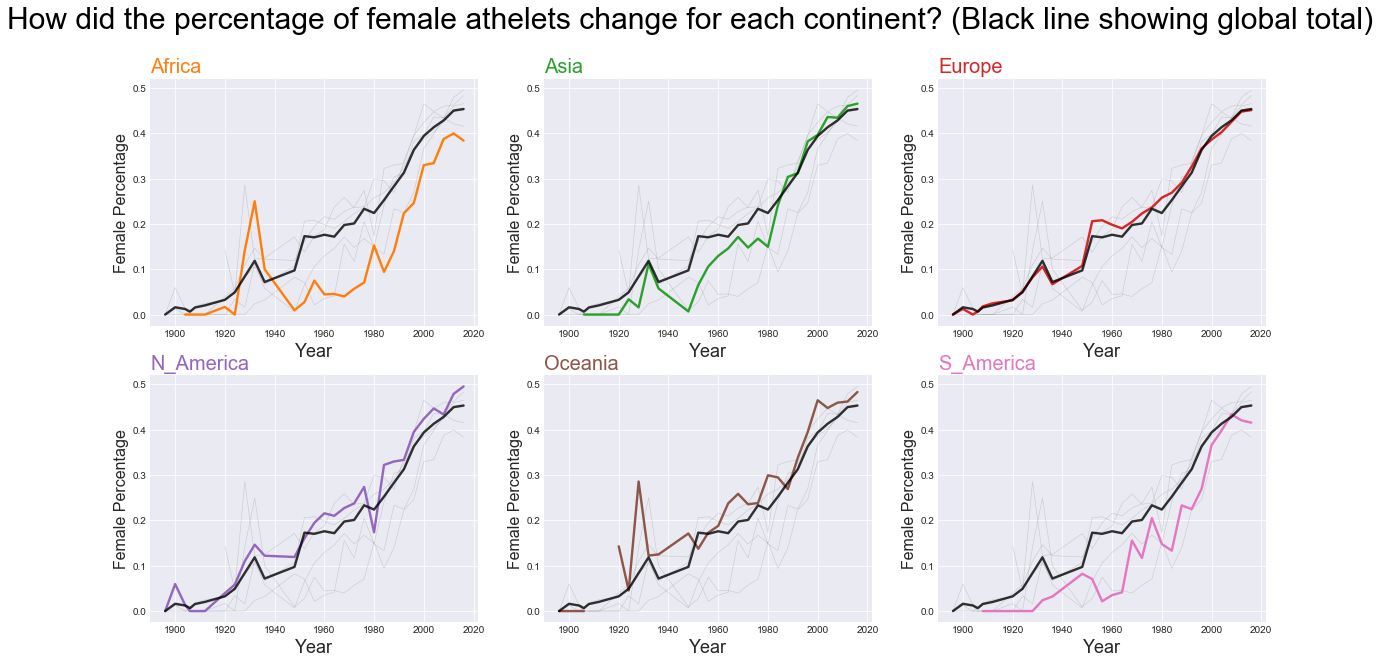

In [72]:
plt.figure(figsize=(20,10))

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('tab10')
 
# multiple line plot
num=0
for column in df4.drop(['Year', 'All'], axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # plot every groups, but discreet
    for v in df4.drop(['Year', 'All'], axis=1):
        plt.plot(df4['Year'], df4[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df4['Year'], df3[column], marker='', color=palette(num), linewidth=2.4, alpha=1, label=column)
    plt.plot(df4['Year'], df4['All'], marker='', color='k', linewidth=2.4,alpha=0.8)

    # Add title
    plt.title(column, loc='left', fontsize=20, fontweight=0, color=palette(num) )
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Female Percentage', fontsize=16,rotation=90)
 
# general title
plt.suptitle("How did the percentage of female athelets change for each continent? (Black line showing global total)", fontsize=30, fontweight=3, color='black', style='normal')

plt.savefig('g-2-6')


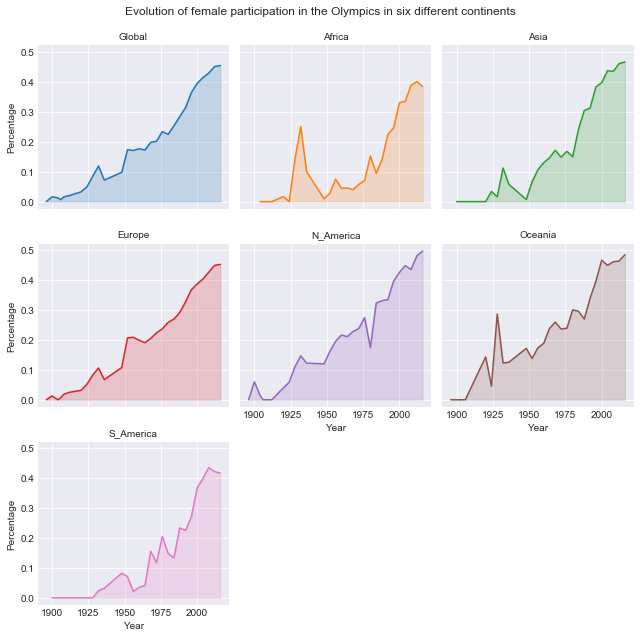

In [39]:
# Create a grid : initialize it
g = sns.FacetGrid(df3_tidy, col='Continent', hue='Continent', col_wrap=3, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'Percentage')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'Percentage', alpha=0.2).set_titles("{col_name} Continent")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of female participation in the Olympics in six different continents')
 
plt.show()

In [40]:
summer_con['BMI']=summer_con['Weight']/summer_con['Height']/summer_con['Height']*10000
summer_con.sample(6)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,249 countries,code_3,Continent_Name,BMI
56477,33598,Osmond Ezinwa,M,20.0,182.0,79.0,Nigeria,NGR,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 100 metres Relay,Silver,Nigeria,NGA,Africa,23.849777
136947,81309,"John Philip ""Phil"" Monckton",M,24.0,196.0,100.0,Canada,CAN,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Men's Coxless Fours,NaN,Canada,CAN,North America,26.030820
131361,78057,Arturo Medina MacKey,M,NaN,NaN,NaN,Chile,CHI,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's Javelin Throw,NaN,Chile,CHL,South America,NaN
37895,22668,Dorian Coninx,M,22.0,181.0,70.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Triathlon,Triathlon Men's Olympic Distance,NaN,France,FRA,Europe,21.366869
18646,11270,"Lisa ""Louise"" Bianchini (Wadstrm-)",F,68.0,NaN,NaN,Sweden,SWE,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,Sweden,SWE,Europe,NaN
218238,129419,"Heinrich ""Heinz"" Weis",M,29.0,193.0,120.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,Germany,DEU,Europe,32.215630


In [41]:
bmi=summer_con[['249 countries','code_3','BMI']]
bmi.tail()

,249 countries,code_3,BMI
229003,Russian Federation,RUS,21.499597
229004,Russian Federation,RUS,21.499597
229005,Russian Federation,RUS,21.499597
229006,Russian Federation,RUS,21.499597
229007,Belarus,BLR,23.597004


In [42]:
bmi.columns = ['Country', 'ISO', 'BMI']
bmi.tail()

,Country,ISO,BMI
229003,Russian Federation,RUS,21.499597
229004,Russian Federation,RUS,21.499597
229005,Russian Federation,RUS,21.499597
229006,Russian Federation,RUS,21.499597
229007,Belarus,BLR,23.597004


In [43]:
bmi.to_csv("output.csv", index=False)

In [44]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [45]:
summer_con.to_csv('summer_con.csv',index=False)

In [46]:
continent_4_sp.head()

,249 countries,code_3,IOC
0,Afghanistan,AFG,AFG
1,Åland,ALA,NaN
2,Albania,ALB,ALB
3,Algeria,DZA,ALG
4,American Samoa,ASM,ASA


In [47]:
continent_4_sp.columns =['CountryName','ISO','NOC']
continent_4_sp.head()

,CountryName,ISO,NOC
0,Afghanistan,AFG,AFG
1,Åland,ALA,NaN
2,Albania,ALB,ALB
3,Algeria,DZA,ALG
4,American Samoa,ASM,ASA


In [48]:
noc_tab=pd.read_csv('/Users/Tal/Desktop/2019 Fall/Data Visualization/final project/noc_tab.csv')
noc_tab.columns=['NOC','0','1','MedalRate']
noc_tab.head()

,NOC,0,1,MedalRate
0,AFG,124,2,0.015873
1,AHO,73,1,0.013514
2,ALB,63,0,0.000000
3,ALG,522,17,0.031540
4,AND,53,0,0.000000


In [49]:
medalrate_merged=noc_tab.merge(continent_4_sp, on='NOC', how='left')

In [50]:
medalrate_merged.sample(20)

,NOC,0,1,MedalRate,CountryName,ISO
178,SGP,340,9,0.025788,NaN,NaN
17,BAR,218,1,0.004566,Barbados,BRB
215,URU,512,63,0.109565,Uruguay,URY
168,ROT,12,0,0.000000,NaN,NaN
171,RUS,2678,905,0.252582,Russian Federation,RUS
61,ERI,42,1,0.023256,Eritrea,ERI
21,BER,204,1,0.004878,Bermuda,BMU
207,TUR,1083,95,0.080645,Turkey,TUR
29,BRA,3309,475,0.125529,Brazil,BRA
187,SSD,3,0,0.000000,NaN,NaN


In [51]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [52]:
trace = go.Choropleth(
            locations = medalrate_merged['ISO'],
            locationmode='ISO-3',
            z = medalrate_merged['MedalRate'],
            text = medalrate_merged['CountryName'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'MedalRate',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Medal Rate of Olympic countries',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'orthographic'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)



In [53]:
medal_try_tab=pd.read_csv('/Users/Tal/Desktop/2019 Fall/Data Visualization/final project/medal_try_table.csv')
medal_try_tab.columns=['NOC','0','1','2','4','MedalRate']
medal_try_tab.MedalRate=medal_try_tab.MedalRate.round(2)
medal_try_tab.head()


,NOC,0,1,2,4,MedalRate
0,AFG,124,2,0,0,0.02
1,AHO,73,0,1,0,0.03
2,ALB,63,0,0,0,0.00
3,ALG,522,8,4,5,0.07
4,AND,53,0,0,0,0.00


In [54]:
medalrate_merged2=medal_try_tab.merge(continent_4_sp, on='NOC', how='left')

In [55]:
medalrate_merged2.sample(2)

,NOC,0,1,2,4,MedalRate,CountryName,ISO
215,URU,512,30,2,31,0.27,Uruguay,URY
55,DEN,2866,177,236,179,0.39,Denmark,DNK


In [56]:
trace = go.Choropleth(
            locations = medalrate_merged2['ISO'],
            locationmode='ISO-3',
            z = medalrate_merged2['MedalRate'],
            text = medalrate_merged2['CountryName'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Medal Efficiency',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Medal efficiency of Olympic countries',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'orthographic'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

